In [20]:
import numpy as np
from scipy.optimize import minimize

# Training data
X_positive = np.array([[-2, 9], [3, 14], [4, 4], [8, -6], [12, -4], [13, 11]])
X_negative = np.array([[-11, 8], [-8, -3], [-6, 4], [-2, -10], [2, -15], [6, -14]])
#X_positive = np.array([[-2, 0]])
#X_negative = np.array([[0, 0], [0, -1]])

# Combine the data
X = np.vstack((X_positive, X_negative))
y = np.array([1]*len(X_positive) + [-1]*len(X_negative))  # Labels

# Problem size
N, d = X.shape

# QP matrices and vectors
Q = np.zeros((d + 1, d + 1))  # Quadratic matrix for w1, w2, b
Q[1:, 1:] = np.eye(d)  # Only affects w1, w2

p = np.zeros(d + 1)  # Linear term

# Constraints
A = np.hstack((y[:, None], y[:, None] * X))  # Combine bias and weights
c = np.ones(N)  # Right-hand side of constraints

# Objective function
def objective(u):
    return 0.5 * np.dot(u, Q @ u)  # 1/2 * u.T * Q * u

# Constraints for optimization
constraints = [
    {'type': 'ineq', 'fun': lambda u, i=i: np.dot(A[i], u) - c[i]} for i in range(N)
]

# Initial guess
u0 = np.zeros(d + 1)

# Solve the QP problem
solution = minimize(objective, u0, constraints=constraints, method='SLSQP')

# Extract results
optimal_b = solution.x[0]
optimal_w = solution.x[1:]
solution.success, optimal_b, optimal_w


(np.True_, np.float64(-0.09090909090909106), array([0.27272727, 0.18181818]))

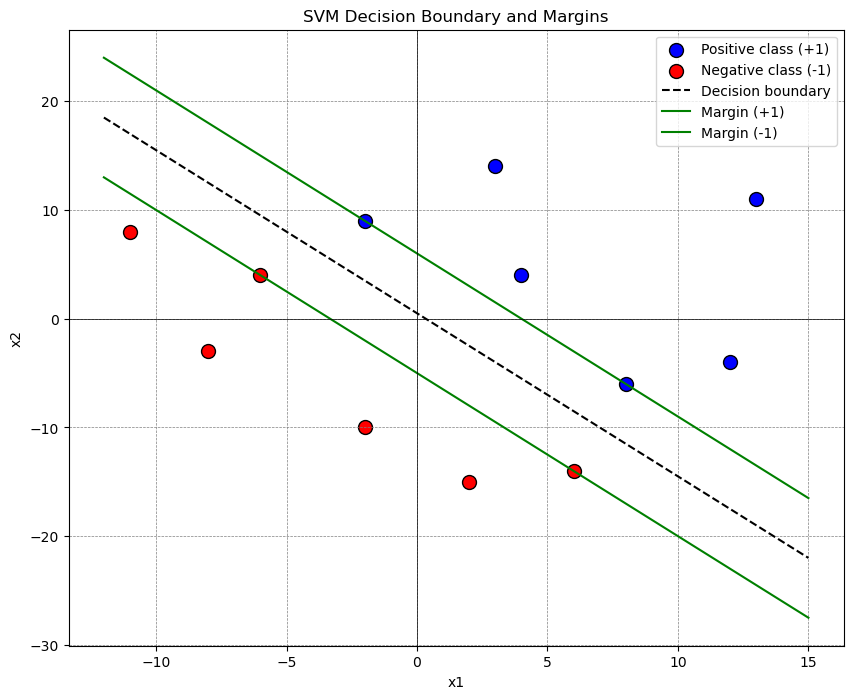

In [21]:
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(10, 8))

# Plot the points
plt.scatter(X_positive[:, 0], X_positive[:, 1], color='blue', label='Positive class (+1)', s=100, edgecolor='k')
plt.scatter(X_negative[:, 0], X_negative[:, 1], color='red', label='Negative class (-1)', s=100, edgecolor='k')

# Decision boundary
x_vals = np.linspace(-12, 15, 300)
decision_boundary = -(optimal_w[0] / optimal_w[1]) * x_vals - optimal_b / optimal_w[1]
margin_up = decision_boundary + 1 / optimal_w[1]
margin_down = decision_boundary - 1 / optimal_w[1]

plt.plot(x_vals, decision_boundary, 'k--', label='Decision boundary')
plt.plot(x_vals, margin_up, 'g-', label='Margin (+1)')
plt.plot(x_vals, margin_down, 'g-', label='Margin (-1)')

# Additional plot settings
plt.title("SVM Decision Boundary and Margins")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()
